In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Phase transition with the temperature
We first want to observe a phase transition as the binding energy decreases. Similarly to the Poland-Scheraga models. We start by looking at the influence of the length of the system. The longer the system, the sharper should be the transition, but the longer should be the simulation to obtain a similar result. The data obtained a half thermodynamic average, i.e. average of a value over time, and half a quenched average over several systems. Because the system is not really ergodic, it is not sufficient to perform time average, however the value taken for each point correspond to a steady state of a given replica of the system.

Here we use the following parameters :
- Emin,Emax = -400.,0 : minimum/maximum value of the binding energy
- Npoints = 50 : number of point taken for the value of the binding energy
- rho0 = 5.*10**-4 : density of crosslinkers
- teq = 1000 : number of timsteps of equilibration before we start the time average measurement of a given system
- t_compute = 10000 : number of timesteps over which we perform the time average of a quantity
- Nreplica = 10 : number of replica of system taken for each point
- reset_linkers_time = 1/10 : number of timesteps before we reset the crosslinkers in unit of t_compute

In [2]:
N_T200 = np.load('Clean_phase_T/N_E_L200.npy')
N_T100 = np.load('Clean_phase_T/N_E_L100.npy')
N_T50 = np.load('Clean_phase_T/N_E_L50.npy')

In [3]:
power_law = lambda X,A,alpha : np.array([A*x**alpha for x in X]) if type(X) == np.ndarray else A*X**alpha
popt,pconv = curve_fit(power_law,-N_T100[:,1],N_T100[:,0])
print(popt)

[0.04587008 0.45713553]


Text(0, 0.5, '$\\rho_{Loops}$')

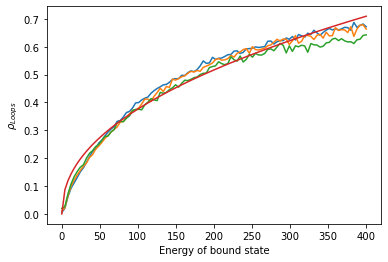

In [4]:
plt.plot(-N_T200[:,1],N_T200[:,0])
plt.plot(-N_T100[:,1],N_T100[:,0])
plt.plot(-N_T50[:,1],N_T50[:,0])

plt.plot(-N_T100[:,1],power_law(-N_T100[:,1],*popt))
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Energy of bound state')
plt.ylabel(r'$\rho_{Loops}$')

# Influence of crosslinkers reset time

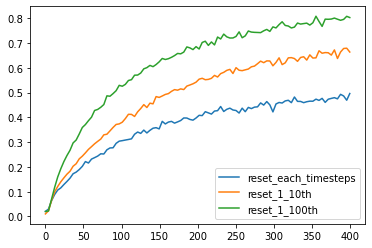

In [94]:
N_T100_r1 = np.load('reset_time/N_E_L50_r1.npy') # reset every timesteps
#N_T100_r12 = np.load('reset_time/N_E_L50_r1_2.npy') # reset every timesteps

N_T100_r100 = np.load('reset_time/N_E_L50_r100.npy') # reset 100 times in the simulation
#N_T100_r1002 = np.load('reset_time/N_E_L50_r1002.npy') # reset 100 times in the simulation

N_T100_r10000 = np.load('reset_time/N_E_L50_r10000.npy') # do not reset in the simulation


#plt.plot(-N_T100_r12[:,1],N_T100_r12[:,0],label='reset_each_timesteps')
plt.plot(-N_T100_r1[:,1],N_T100_r1[:,0],label='reset_each_timesteps')

plt.plot(-N_T100[:,1],N_T100[:,0],label='reset_1_10th')

plt.plot(-N_T100_r100[:,1],N_T100_r100[:,0],label='reset_1_100th')
#plt.plot(-N_T100_r1002[:,1],N_T100_r1002[:,0],label='reset_1_100th')

plt.plot(-N_T100_r10000[:,1],N_T100_r10000[:,0],label='reset_1_10000th')
plt.legend()

# Influence of the total simulation time
not up to date anymore

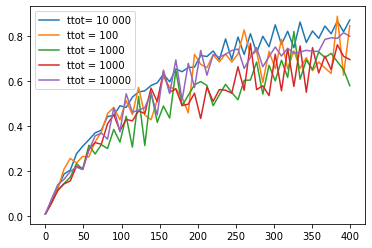

In [50]:
N_T100_t100000 = np.load('tot_time/N_E_L100_ttot100000.npy')

N_T100_t100 = np.load('tot_time/N_E_L100_ttot100.npy')

N_T100_t1000 = np.load('tot_time/N_E_L100_ttot1000.npy')
N_T100_t1000_2 = np.load('tot_time/N_E_L100_ttot1000_2.npy')

plt.plot(-N_T100[:,1],N_T100[:,0],label='ttot= 10 000')

plt.plot(-N_T100_t100[:,1],N_T100_t100[:,0],label='ttot = 100')

plt.plot(-N_T100_t1000[:,1],N_T100_t1000[:,0],label='ttot = 1000')
plt.plot(-N_T100_t1000_2[:,1],N_T100_t1000_2[:,0],label='ttot = 1000')

plt.plot(-N_T100_t100000[:,1],N_T100_t100000[:,0],label='ttot = 10000')

plt.legend()

# Influence of the density

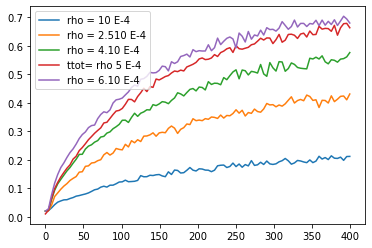

In [97]:
N_T100_rho_1 = np.load('rho/N_E_L50_rho1_E-4.npy')
N_T100_rho_4 = np.load('rho/N_E_L50_rho4_E-4.npy')
N_T100_rho_6 = np.load('rho/N_E_L50_rho6_E-4.npy')
N_T100_rho_2_5 = np.load('rho/N_E_L50_rho2_5_E-4.npy')

plt.plot(-N_T100_rho_1[:,1],N_T100_rho_1[:,0],label='rho = 10 E-4')
plt.plot(-N_T100_rho_2_5[:,1],N_T100_rho_2_5[:,0],label='rho = 2.510 E-4')
plt.plot(-N_T100_rho_4[:,1],N_T100_rho_4[:,0],label='rho = 4.10 E-4')
plt.plot(-N_T100[:,1],N_T100[:,0],label='ttot= rho 5 E-4')
plt.plot(-N_T100_rho_6[:,1],N_T100_rho_6[:,0],label='rho = 6.10 E-4')

plt.legend()

# Impact of the number of replicas

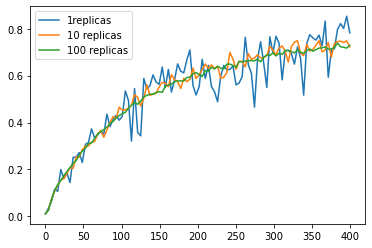

In [87]:
N_T100_1replica2 = np.load('replica/N_E_L100_1replica2.npy')
N_T100_1replica = np.load('replica/N_E_L100_1replica.npy')
N_T100_10replica = np.load('replica/N_E_L100_10replica.npy')
N_T100_20replica = np.load('replica/N_E_L100_20replica.npy')
#N_T100_20replica2 = np.load('replica/N_E_L100_20replica2.npy')
N_T100_30replica = np.load('replica/N_E_L100_30replica.npy')
N_T100_40replica = np.load('replica/N_E_L100_40replica.npy')
N_T100_100replica = np.load('replica/N_E_L100_100replica.npy')
N_T100_500replica = np.load('replica/N_E_L100_500replica.npy')

#plt.plot(-N_T100_1replica[:,1],N_T100_1replica[:,0],label='1replicas')
plt.plot(-N_T100_1replica2[:,1],N_T100_1replica2[:,0],label='1replicas')
plt.plot(-N_T100_10replica[:,1],N_T100_10replica[:,0],label='10 replicas')
#plt.plot(-N_T100_20replica[:,1],N_T100_20replica[:,0],label='20 replicas')
#plt.plot(-N_T100_20replica2[:,1],N_T100_20replica2[:,0],label='20 replicas')
#plt.plot(-N_T100_30replica[:,1],N_T100_30replica[:,0],label='30 replicas')
#plt.plot(-N_T100_40replica[:,1],N_T100_40replica[:,0],label='40 replicas')
plt.plot(-N_T100_100replica[:,1],N_T100_100replica[:,0],label='100 replicas')
#plt.plot(-N_T100_500replica[:,1],N_T100_500replica[:,0],label='500 replicas')

plt.legend()